<a href="https://colab.research.google.com/github/cyuancheng/Machine_Learning_Practice/blob/master/ML101_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn import tree

### note
Dash (transfer python code to js, visulization, ploty)
Heroku (deploy)

#### how ML model learn?
- through cost function (define cost function)
- how model make mistake & minimize the mistake

penity

MSE (mean square error)


In [0]:
# https://www.kaggle.com/dalalmanish/black-friday

data = pd.read_csv('https://raw.githubusercontent.com/princetonschoolofai/ML101Retail/master/train.csv')

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
# First case: Gender
''
data1 = data[['Gender','Purchase']]
print(data1.groupby(['Gender']).mean())

print("\n", data1.head())


           Purchase
Gender             
F       8734.565765
M       9437.526040

   Gender  Purchase
0      F      8370
1      F     15200
2      F      1422
3      F      1057
4      M      7969


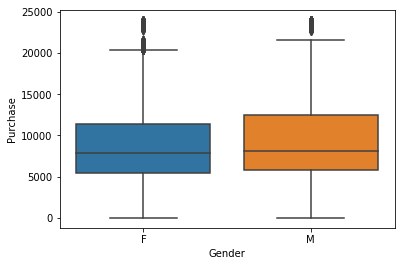

In [0]:
sns.boxplot(x='Gender', y='Purchase', data=data1)
plt.show()

In [0]:
data1.head()

,Purchase,Gender_F,Gender_M
0,8370,1,0
1,15200,1,0
2,1422,1,0
3,1057,1,0
4,7969,0,1


In [0]:
data1 = pd.get_dummies(data1)

X1_train_temp, X1_test_temp, y1_train_temp, y1_test_temp = tts(data1['Gender_M'],data1['Purchase'], test_size=0.05, random_state=42)

X1_train = np.array(X1_train_temp).reshape(-1,1)
y1_train = np.array(y1_train_temp).reshape(-1,1)
X1_test = np.array(X1_test_temp).reshape(-1,1)
y1_test = np.array(y1_test_temp).reshape(-1,1)

dtr1 = dtr(criterion='mse', random_state=50) # Decision Tree

dtr1.fit(X1_train,y1_train)
dtr1.predict([[0]]) # predict Female 


array([8734.02418548])

prediction is close to mean value of female purchase 

In [0]:
# lost function

y = [y[0] for x,y in zip(X1_train, y1_train) if x[0] == 0]

MSE_values = []
lower_mse = 100000000000000
optimum_index = 0

count = 0

for i in range(5000,10000):
  count +=1
  
  if count%200==0:
    print(count)
  
  y_possible = np.full((1,len(y)), i)
  
  
  n = len(y)
  
  difference = y-y_possible
  
  squared_diff = [x**2 for x in difference]
  
  
  MSE = sum(squared_diff[0])/n
  
  MSE_values.append(MSE)

  
  if MSE < lower_mse:
    optimum_index = i
    lower_mse = MSE
  
print(optimum_index)
  


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
8734


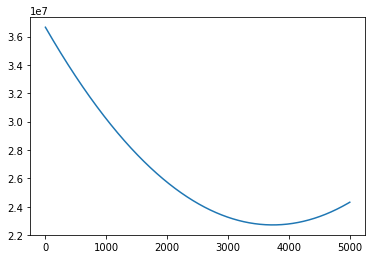

In [0]:
plt.plot(MSE_values)

In [0]:
dtr1.score(X1_test,y1_test) # Returns the R2 of this regression  (return MSE)

0.003080647478559073

R2 is very low because only have gender as an input. Need to add more features for input

In [0]:
# Second case: Gender and City_Category

data2 = data[['Gender','City_Category','Purchase']]

data2 = pd.get_dummies(data2)

print(data2.head())
print(data2.columns)

   Purchase  Gender_F  ...  City_Category_B  City_Category_C
0      8370         1  ...                0                0
1     15200         1  ...                0                0
2      1422         1  ...                0                0
3      1057         1  ...                0                0
4      7969         0  ...                0                1

[5 rows x 6 columns]
Index(['Purchase', 'Gender_F', 'Gender_M', 'City_Category_A',
       'City_Category_B', 'City_Category_C'],
      dtype='object')


don't put redudancy info as feature (F/M)

In [0]:
X2_train, X2_test, y2_train_temp, y2_test_temp = tts(data2[['Gender_F', 'City_Category_B', 'City_Category_C']],data2['Purchase'], test_size=0.05, random_state=42)

y2_train = np.array(y2_train_temp).reshape(-1,1)
y2_test = np.array(y2_test_temp).reshape(-1,1)

dtr2 = dtr(criterion='mse', random_state=50) # need to create a new object. Can not use dtr1

dtr2.fit(X2_train,y2_train)
dtr2.predict([[0,0,0]])  # predict male in city category A

array([9021.54452785])

In [0]:
dtr2.score(X2_test, y2_test)

0.008618370061797775

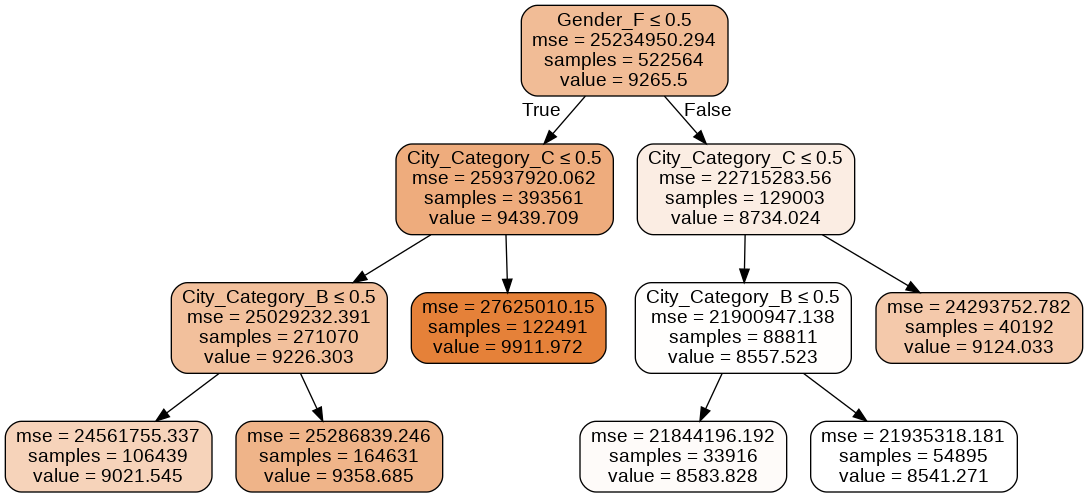

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_cols = ['Gender_F', 'City_Category_B', 'City_Category_C']

dot_data = StringIO()
export_graphviz(dtr2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('marketing.png')
Image(graph.create_png())

gini distribution (measure difference between true and predict value)
entropy


In [0]:
# Second case: Gender and City_Category and Age

data3 = data[['Gender','City_Category','Age','Purchase']]

data3 = pd.get_dummies(data3)

print(data3.head())
print(data3.columns)


   Purchase  Gender_F  Gender_M  ...  Age_46-50  Age_51-55  Age_55+
0      8370         1         0  ...          0          0        0
1     15200         1         0  ...          0          0        0
2      1422         1         0  ...          0          0        0
3      1057         1         0  ...          0          0        0
4      7969         0         1  ...          0          0        1

[5 rows x 13 columns]
Index(['Purchase', 'Gender_F', 'Gender_M', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+'],
      dtype='object')


In [0]:
columns_of_interest = ['Gender_F','City_Category_B', 'City_Category_C', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55']

X3_train, X3_test, y3_train_temp, y3_test_temp = tts(data3[columns_of_interest],data3['Purchase'], test_size=0.05, random_state=42)

y3_train = np.array(y3_train_temp).reshape(-1,1)
y3_test = np.array(y3_test_temp).reshape(-1,1)

dtr3 = dtr(criterion='mse', random_state=50)

dtr3.fit(X3_train,y3_train)
dtr3.predict([[0,0,0,0,0,0,0,0,0]])

array([8398.44070565])

In [0]:
dtr3.score(X3_test, y3_test)

0.010563405769737466

In [0]:
print(dtr3.feature_importances_)

[0.37321485 0.06470507 0.37446239 0.03322475 0.05348067 0.01595736
 0.02118161 0.03627008 0.02750323]


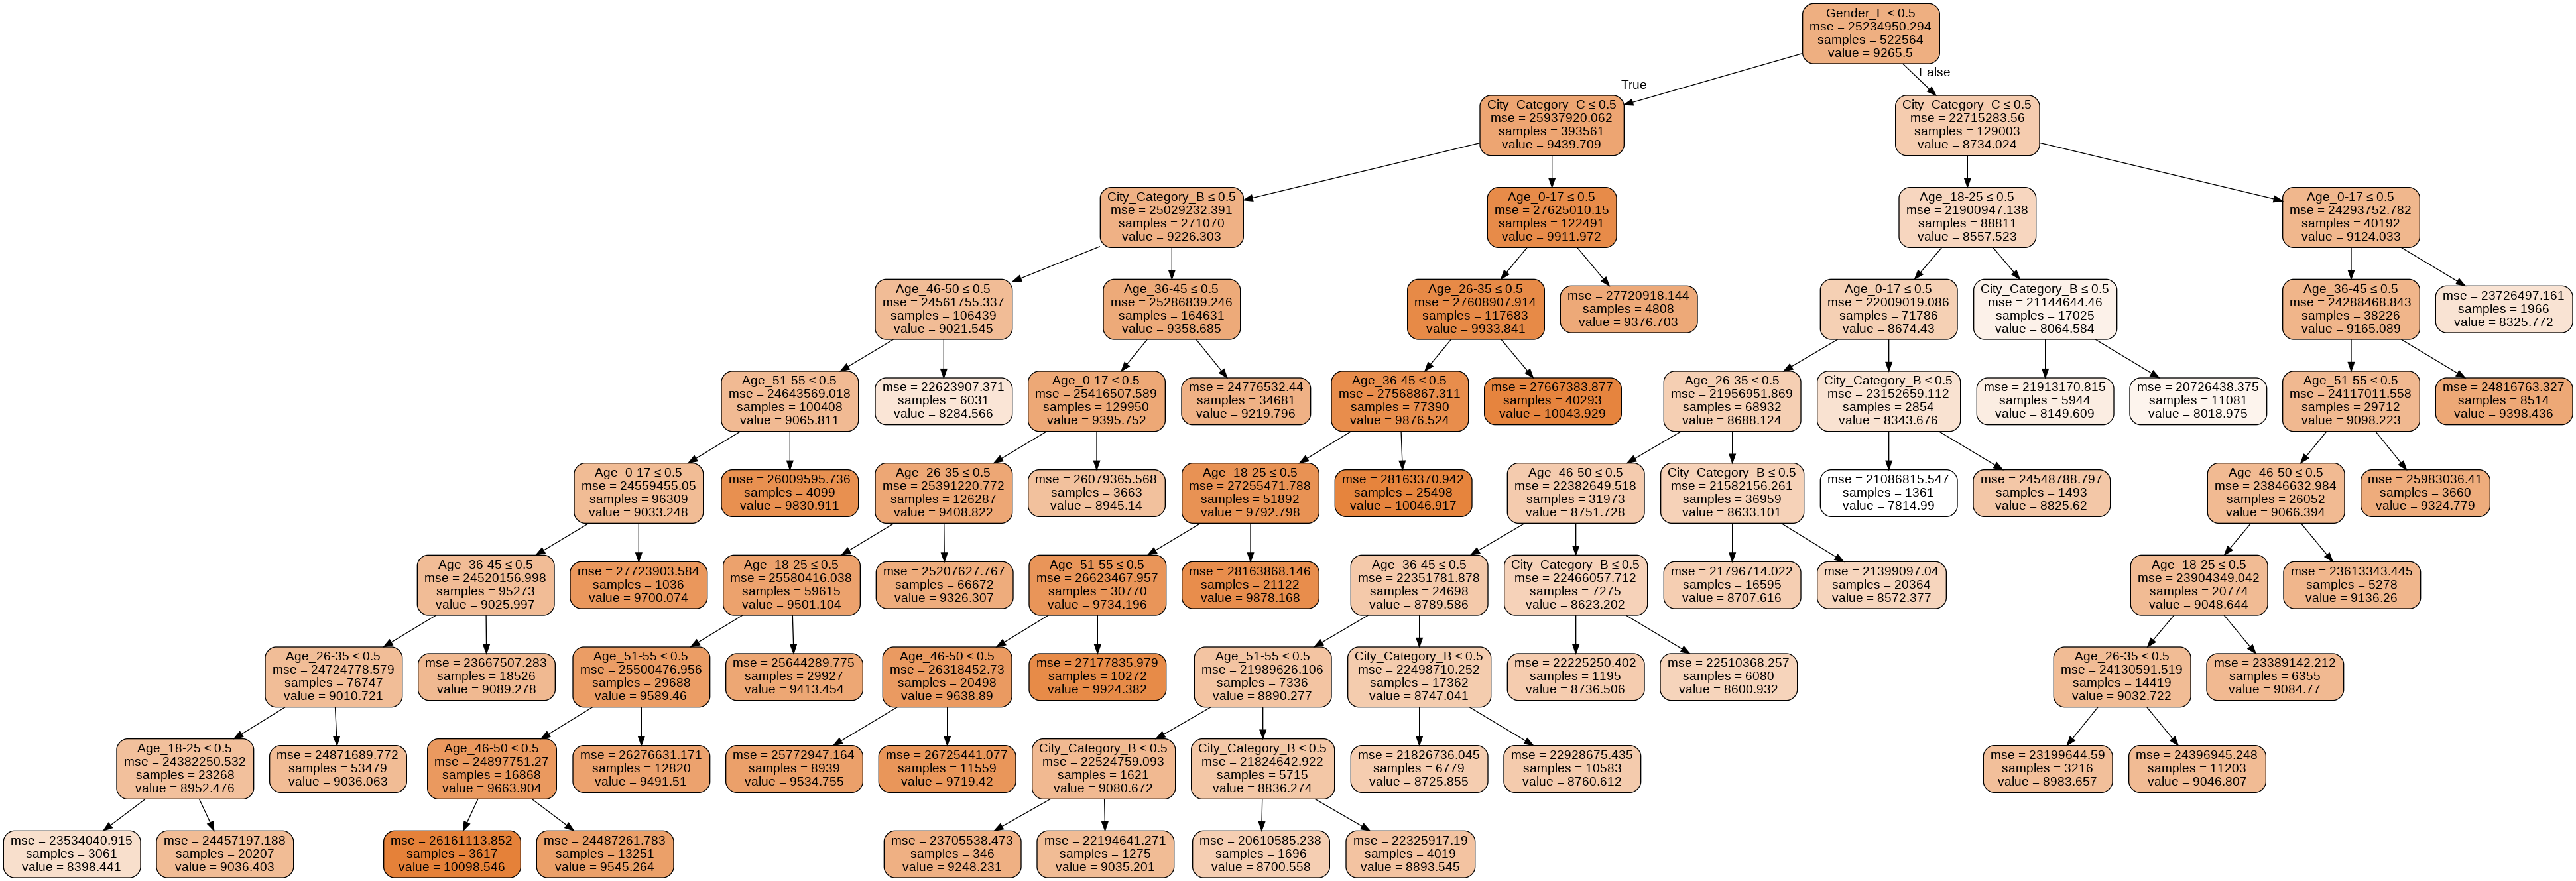

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_cols = columns_of_interest

dot_data = StringIO()
export_graphviz(dtr3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('marketing.png')
Image(graph.create_png())

In [0]:
rfr1 = rfr(n_estimators=1000, random_state=50)

rfr1.fit(X3_train,y3_train)
rfr1.predict([[0,0,0,0,0,0,0,0,0]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([8394.95189282])

In [0]:
rfr1.score(X3_test, y3_test)

0.010567211976262092

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_cols = columns_of_interest

dot_data = StringIO()
export_graphviz(rfc1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('marketing.png')
Image(graph.create_png())